In [ ]:
#Importação da bliblioteca
import pandas as pd

In [ ]:
df1 = pd.read_excel("/content/drive/MyDrive/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/datasets/Salvador.xlsx")

In [ ]:
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
34,Fortaleza,2019-01-01,3.10,1003,5
0,Aracaju,2018-01-01,142.00,1520,1
12,Recife,2019-01-01,17.48,982,2
96,Natal,2019-01-02,42.94,1034,3
103,Fortaleza,2019-01-01,142.57,1002,3


In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#Alterando tipo de dados
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

**Tratando Valores Faltantes**


In [ ]:
#Consultuando linhas com valores flatantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [34]:
#Criando nova coluna
df["receita"] = df["Vendas"].mul(df["Qtde"])

In [35]:
df["receita"].max()

3544.0

In [ ]:
df["receita"].min()

3.34

In [ ]:
df.nlargest(3, "receita")

,Cidade,Data,Vendas,LojaID,Qtde,receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [37]:
df.nsmallest(3, "receita")

,Cidade,Data,Vendas,LojaID,Qtde,receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


**Trabalhando com Datas**

In [26]:
#trasformando data em int
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [27]:
#trasformando data em data 
df["Data"] = pd.to_datetime(df["Data"])

In [38]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: receita, dtype: float64

**Visualizando Dados**

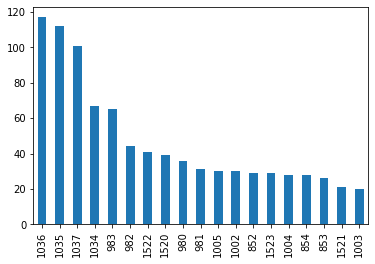

In [39]:
#Graficos de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

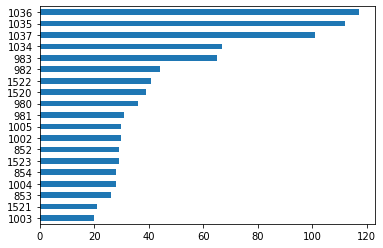

In [40]:
#Graficos de barras horizontal
df["LojaID"].value_counts(ascending=True).plot.barh()

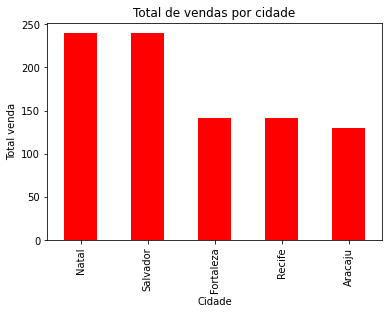

In [44]:
#Adicionando titulo e alterando nomes
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total venda");

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

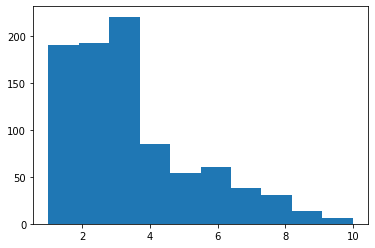

In [47]:
plt.hist(df["Qtde"])